# Сбербанк ML-проект (Kaggle)

## Кохновер Илья
### М06-108ск


In [2]:
# /home/koxno/PycharmProjects/ml1

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
pd.options.display.max_columns = 500

In [4]:
# /home/elijah/PycharmProjects/ml1
train = pd.read_csv('../data/raw/train.csv')
test = pd.read_csv('../data/raw/test.csv')

In [5]:
# scikit-learn k-fold кросс-валидация
from sklearn.model_selection import KFold
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
import matplotlib.pyplot as plt

def crossValFunc(train, features, target, k_samples):
    model = SGDRegressor()

    msle_list = []
    mse_list = []
    i = 0
    kfold = KFold(n_splits= k_samples, shuffle = True)

    for _, (train_index, val_index) in enumerate(kfold.split(train)):
        
        Ktrain = train.iloc[train_index, : ]
        Ktest = train.iloc[val_index, :  ]
        
        model.fit(X = Ktrain[features], y = Ktrain[target])
        test_predict = model.predict(Ktest[features])

        mse = mean_squared_error(test_predict, Ktest[target])
        msle = mean_squared_log_error(test_predict.clip(0.0001,), Ktest[target])

        msle_list.append(msle)
        mse_list.append(mse)
        i+=1
        print( f'Fold {i}: msle {msle} , mse {mse}')
    msle_list = sum(msle_list)/len(msle_list)
    mse_list = sum(mse_list)/len(mse_list)
    return(msle_list, mse_list)


In [5]:
# 1 МОДЕЛЬ
# Зависимость (цены) от 1) общей площади квартиры, дальности до 2) метро, 3) центра
# Значения NaN в metro_km_walk заполняются 0

train_1model = train.copy()
features = ['metro_km_walk', 'kremlin_km', 'full_sq']
target = 'price_doc'
k_samples = 5

In [6]:
train_1model[features].describe()

,metro_km_walk,kremlin_km,full_sq
count,30446.000000,30471.000000,30471.000000
mean,3.561467,16.044808,54.214269
std,5.775261,8.441964,38.031487
min,0.000000,0.072897,0.000000
25%,0.957013,10.460471,38.000000
50%,1.703934,14.879161,49.000000
75%,3.776836,20.666814,63.000000
max,59.267984,70.738769,5326.000000


In [7]:
train_1model[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   metro_km_walk  30446 non-null  float64
 1   kremlin_km     30471 non-null  float64
 2   full_sq        30471 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 714.3 KB


In [8]:
# Заменим NaN's в на 0.5 (вряд ли квартира была продана на Красной Площади)
train_1model['metro_km_walk'] = train_1model['metro_km_walk'].fillna(0.5)
None

In [10]:
features1 = features
target1 = target
k_samples1 = k_samples

msle, mse = crossValFunc(train_1model, features1, target1, k_samples1)
print(msle, mse)

Fold 1: msle 110.25104809859646 , mse 7.439517456756846e+22
Fold 2: msle 20.039909776900394 , mse 52712022981015.34
Fold 3: msle 203.95021854042594 , mse 3512443564286894.5
Fold 4: msle 88.44257937340703 , mse 6.601403167705454e+21
Fold 5: msle 64.6258614926052 , mse 2.894763893777284e+17
97.46192345638698 1.619937415536378e+22


In [6]:
# 2 модель

# Зависимость (цены) от 1) общей площади квартиры, дальности до 2) метро, 3) центра
# Значения NaN в metro_km_walk заполняется Медианным
# Выбросы заменяются на квантили 5% 95%

train_2model = train.copy()
features = ['metro_km_walk', 'kremlin_km', 'full_sq']

In [7]:
# Ищу NaN в столбцах
print('NaNs in columns')
for i in features:
    print(i, train_2model[i].isna().sum())
print()

# Проверяю отрицательные значения
print('Negative values')
for i in features:
    print(i, sum([1 for j in train_2model[i] if j < 0]))
print()

# Проверяю нули
print('Zero values')
for i in features:
    print(i, sum([1 for j in train_2model[i] if j == 0]))

NaNs in columns
metro_km_walk 25
kremlin_km 0
full_sq 0

Negative values
metro_km_walk 0
kremlin_km 0
full_sq 0

Zero values
metro_km_walk 1
kremlin_km 0
full_sq 2


/home/elijah/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


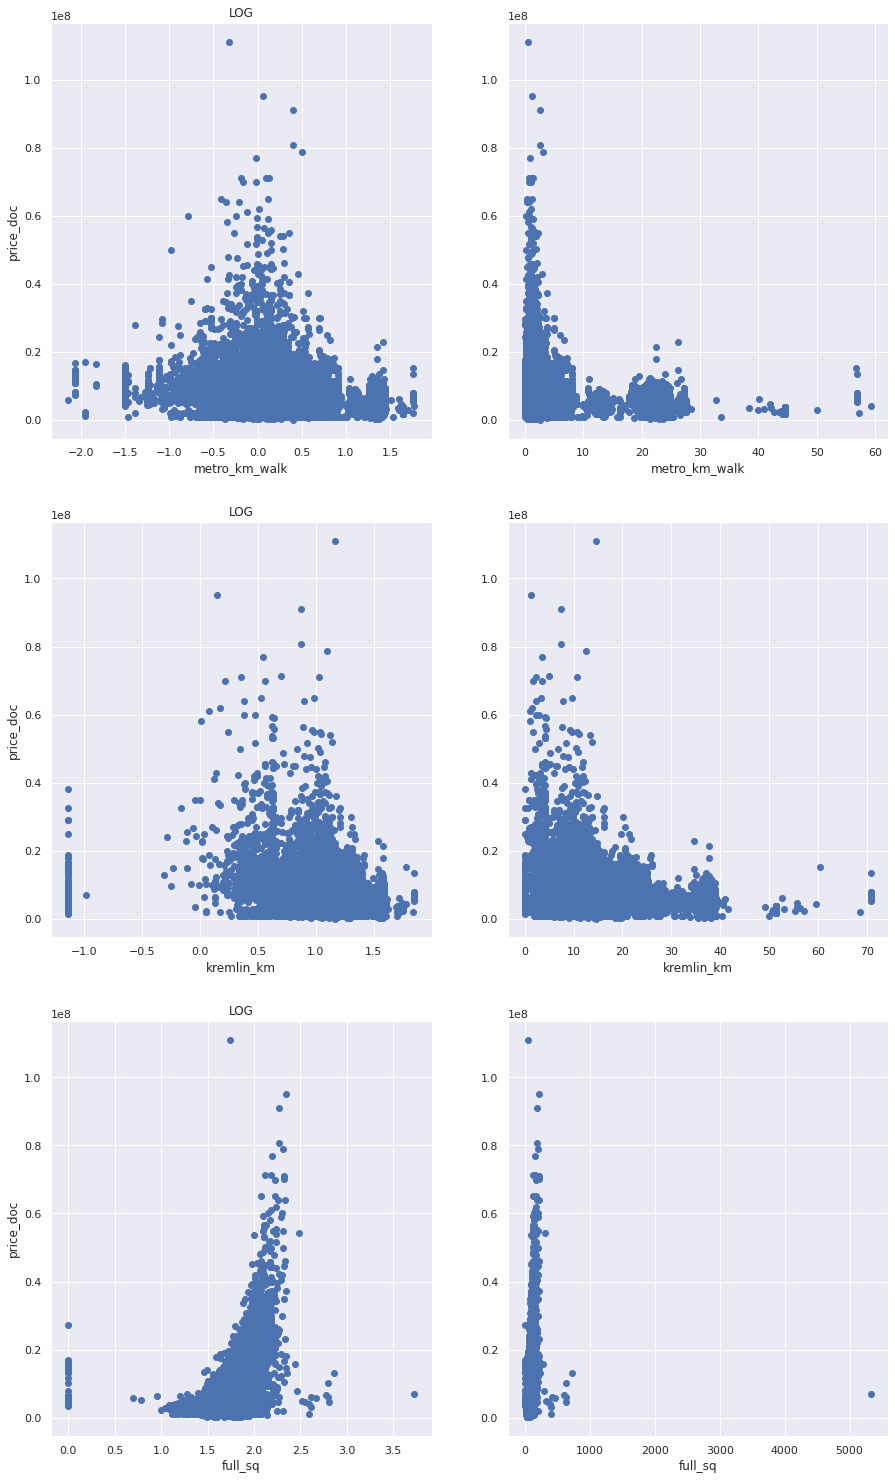

In [8]:
# Строю графики зависимости (цены) от 1) общей площади квартиры, дальности до 2) метро, 3) центра
# Графики с проLOGарифмированными и обычными значениями.
# Строю графики для поиска выброов и зависимостей.

def plot_own_scatter(train_2model,features):
    fig, ax = plt.subplots(nrows=3, ncols=2,  figsize = (15,26))

    for i in range(3):
        for j in range(2):
            if j == 1:
                ax[i,j].scatter(train_2model[features[i]], train_2model['price_doc'])
                ax[i,j].set_xlabel(features[i])

                continue
            ax[i,j].scatter(np.log10(train_2model[features[i]]), train_2model['price_doc'])
            ax[i,j].set_xlabel(features[i])
            ax[i,j].set_ylabel('price_doc')
            ax[i,j].set_title('LOG')

    plt.show()
plot_own_scatter(train_2model,features)

In [9]:
# Заполняю NaN медианным значением
temp_med = train_2model['metro_km_walk'].median()
train_2model['metro_km_walk'].fillna(temp_med, inplace=True)

In [10]:
# Отсекаю строки по значениям full_sq (полная площадь) с 2х сторон по 1% 
quant1 = train_2model['full_sq'].quantile(0.01)
quant99 = train_2model['full_sq'].quantile(0.99)

print(quant1, quant99, sep='\n')
print(np.shape(train_2model))

train_2model = train_2model.loc[train_2model['full_sq'] > quant1]
train_2model = train_2model.loc[train_2model['full_sq'] < quant99]
print(np.shape(train_2model))

27.0
134.0
(30471, 292)
(29763, 292)


In [11]:
# Ищу NaN в столбцах
print('NaNs in columns')
for i in features:
    print(i, train_2model[i].isna().sum())
print()

# Проверяю отрицательные значения
print('Negative values')
for i in features:
    print(i, sum([1 for j in train_2model[i] if j < 0]))
print()

# Проверяю нули
print('Zero values')
for i in features:
    print(i, sum([1 for j in train_2model[i] if j == 0]))

NaNs in columns
metro_km_walk 0
kremlin_km 0
full_sq 0

Negative values
metro_km_walk 0
kremlin_km 0
full_sq 0

Zero values
metro_km_walk 1
kremlin_km 0
full_sq 0


/home/elijah/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


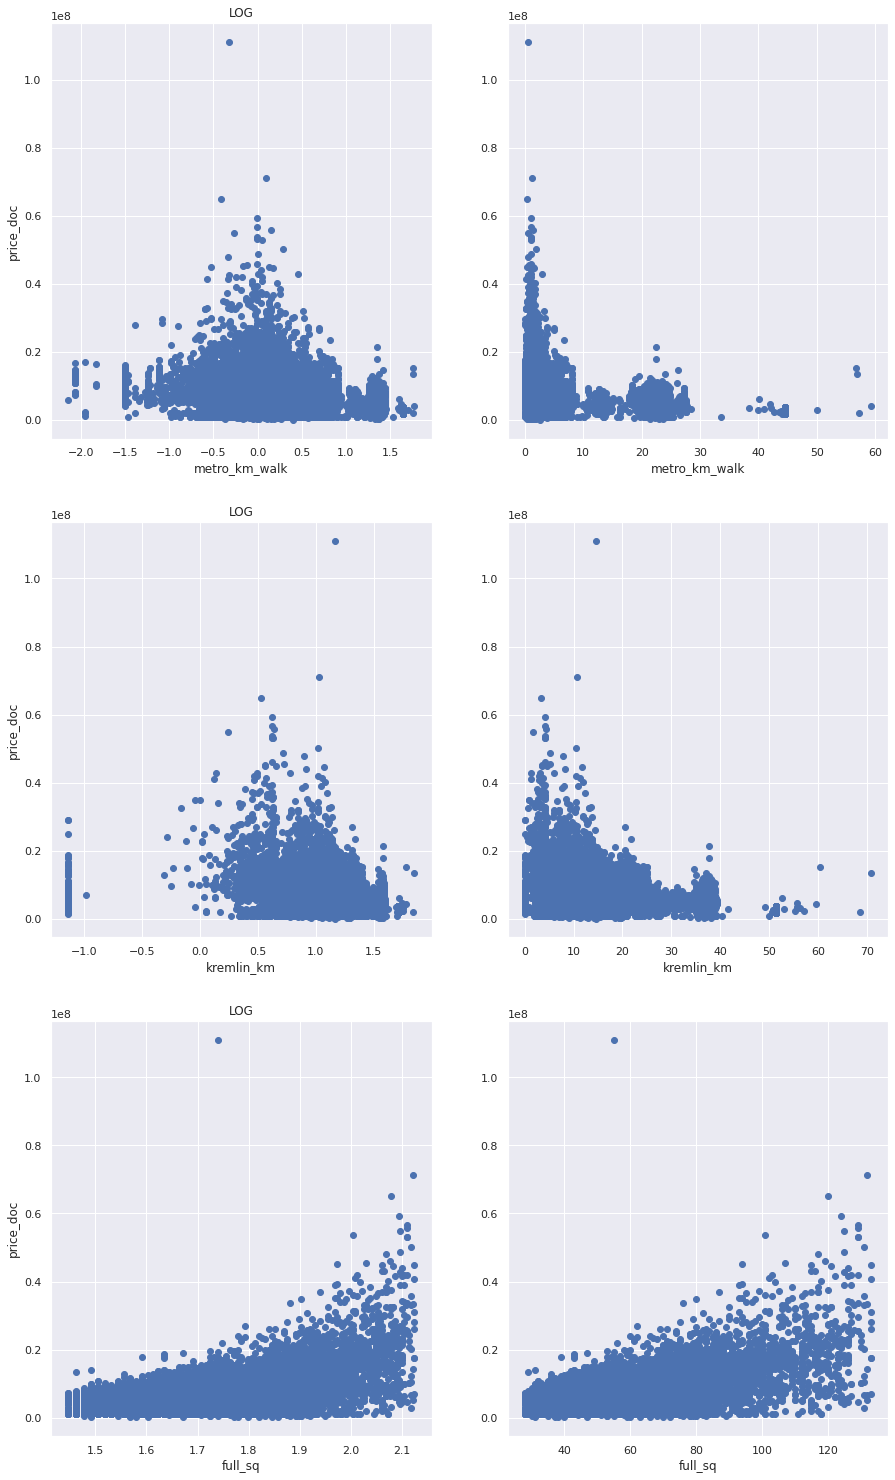

In [12]:
plot_own_scatter(train_2model,features)

In [13]:
# Устанавливаю минимальное значение 0.5 для удаленности от Кремля (центра Москвы) по объективным причинам
train_2model['kremlin_km'].clip(lower=0.5, inplace=True)

In [18]:
# train_2model
features2 = ['metro_km_walk', 'kremlin_km', 'full_sq']
target2 = 'price_doc'
k_samples2 = 5

msle, mse = crossValFunc(train_2model, features2, target2, k_samples2)
print(msle, mse)

Fold 1: msle 116.9251186088292 , mse 65305100571550.7
Fold 2: msle 1.6500535370098017 , mse 201071139836068.4
Fold 3: msle 0.2711054985615388 , mse 11402910431591.559
Fold 4: msle 244.00943349124117 , mse 251803630596890.16
Fold 5: msle 1.8825950727172833 , mse 16081778916454.977
72.9476612416718 109132912070511.17


In [19]:
test_2 = test.copy()

In [20]:
#Обработка тест данных 2

# Заполняю NaN медианным значением
test_2['metro_km_walk'].fillna(temp_med, inplace=True)
# Устанавливаю минимальное значение 0.5 для удаленности от Кремля
test_2['kremlin_km'].clip(lower=0.5, inplace=True)

In [23]:
# *********************************************************************

# Сохраняем ответы 1
train_2 = train_2model
features_2 = features2
target_2 = target2
# Эти данные нужно обработать. НЕЛЬЗЯ ОБРЕЗАТЬ
# test_2


model_2 = SGDRegressor()
model_2.fit(X = train_2[features_2].fillna(0), y = train_2[target_2])
test_predict_2 = model_2.predict(test_2[features_2].fillna(0))


write_submission_2 = pd.read_csv('../data/raw/sample_submission.csv')
write_submission_2[target_2] = test_predict_2.clip(0.0001,)
write_submission_2.to_csv('predict_2.csv', index= False)
# *********************************************************************

# 

In [ ]:
# 3 МОДЕЛЬ
# Ищу ценник квартиры за 1 м2

# 1) Создаю колонку с новой особенностью 'price_for_m2' с округлением до целых

# 2) Отбираю колонки, на которых модель будет обучаться. 
# 'full_sq' уже не подходит, потому что зависимость стоимости за м2 от размеров квартиры нелинейная.
# Из предыдущего набора остаются: 'metro_km_walk', 'kremlin_km'.
# Дополняю набор следующими параметрами: 'state' - состояние квартиры.

# 3) Очищаю набор данных.
# * Заполняю NaN's медианными значениями
# * Округляю все float значения до 1го знака
# * Обрезаю выбросы, ориентируясь на график FEATURE / TARGET
# * В 'kremlin_km' ставлю минимум 2
# * Использую только те данные, где размер помещений пригоден для жилья (от 10 м2)
# * Удаляю явный выброс по фиче цена за м2, последнее значение с бешенным ценником.
# * Зачищаю данные по ценнику за м2. Обрезаю объекты по 1% по бокам.

# 4) Обучаю на новом наборе данных

In [54]:
train_3model = train.copy()

In [55]:
# Создаю колонку с новым таргетом 'price_for_m2' с округлением до целых.
# Колонка содержит стоимость 1 м2 каждой квартиры.
train_3model['price_for_m2'] = round(train_3model['price_doc'] / train_3model['full_sq'])

In [56]:
train_columns_3model = ['metro_km_walk', 'kremlin_km', 'state']
train_set_3model = train_3model[train_columns_3model + ['price_doc','full_sq', 'price_for_m2']].copy()

In [57]:
train_set_3model.head()

,metro_km_walk,kremlin_km,state,price_doc,full_sq,price_for_m2
0,1.131260,15.156211,NaN,5850000,43,136047.0
1,0.635053,8.698054,NaN,6000000,34,176471.0
2,1.445960,9.067885,NaN,5700000,43,132558.0
3,0.963802,19.487005,NaN,13100000,89,147191.0
4,0.688859,2.578671,NaN,16331452,77,212097.0


In [58]:
train_set_3model['state'].value_counts()
# 33 - однозначно выброс.

2.0     5844
3.0     5790
1.0     4855
4.0      422
33.0       1
Name: state, dtype: int64

In [59]:
train_set_3model.info()
# У state и metro_km_walk NaN's в колонках.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   metro_km_walk  30446 non-null  float64
 1   kremlin_km     30471 non-null  float64
 2   state          16912 non-null  float64
 3   price_doc      30471 non-null  int64  
 4   full_sq        30471 non-null  int64  
 5   price_for_m2   30471 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 1.4 MB


In [60]:
for col in train_columns_3model:
    print(f"MED {col}: {train_set_3model[col].median()}")
    print(f"MEAN {col}: {train_set_3model[col].mean()}", end = '\n\n')
# Медианы практически не отличаются от средних значений. 
# Для заполнения пропусковбудем использовать Медианы.

MED metro_km_walk: 1.703934087
MEAN metro_km_walk: 3.561466753071865

MED kremlin_km: 14.87916101
MEAN kremlin_km: 16.044808352000857

MED state: 2.0
MEAN state: 2.1070245979186377



In [61]:
# Доля NaN's в фичах
for col in train_columns_3model:
    print(f'MEAN NaN {col}: {train_set_3model[col].isna().mean()}')
print()
for col in train_columns_3model:
    print(f'SUM NaN {col}: {sum(train_set_3model[col].isna())} / {len(train_set_3model[col])}')

MEAN NaN metro_km_walk: 0.000820452233270979
MEAN NaN kremlin_km: 0.0
MEAN NaN state: 0.44498047323684814

SUM NaN metro_km_walk: 25 / 30471
SUM NaN kremlin_km: 0 / 30471
SUM NaN state: 13559 / 30471


In [62]:
# Заполняем NaN's Медианами

for col in train_columns_3model:
    train_set_3model[col] = train_set_3model[col].fillna(train_set_3model[col].median())

In [63]:
# Округляем все float значения до 1го знака
for col in train_columns_3model:
    train_set_3model[col] = round(train_set_3model[col], 1)

In [64]:
train_set_3model.head()

,metro_km_walk,kremlin_km,state,price_doc,full_sq,price_for_m2
0,1.1,15.2,2.0,5850000,43,136047.0
1,0.6,8.7,2.0,6000000,34,176471.0
2,1.4,9.1,2.0,5700000,43,132558.0
3,1.0,19.5,2.0,13100000,89,147191.0
4,0.7,2.6,2.0,16331452,77,212097.0


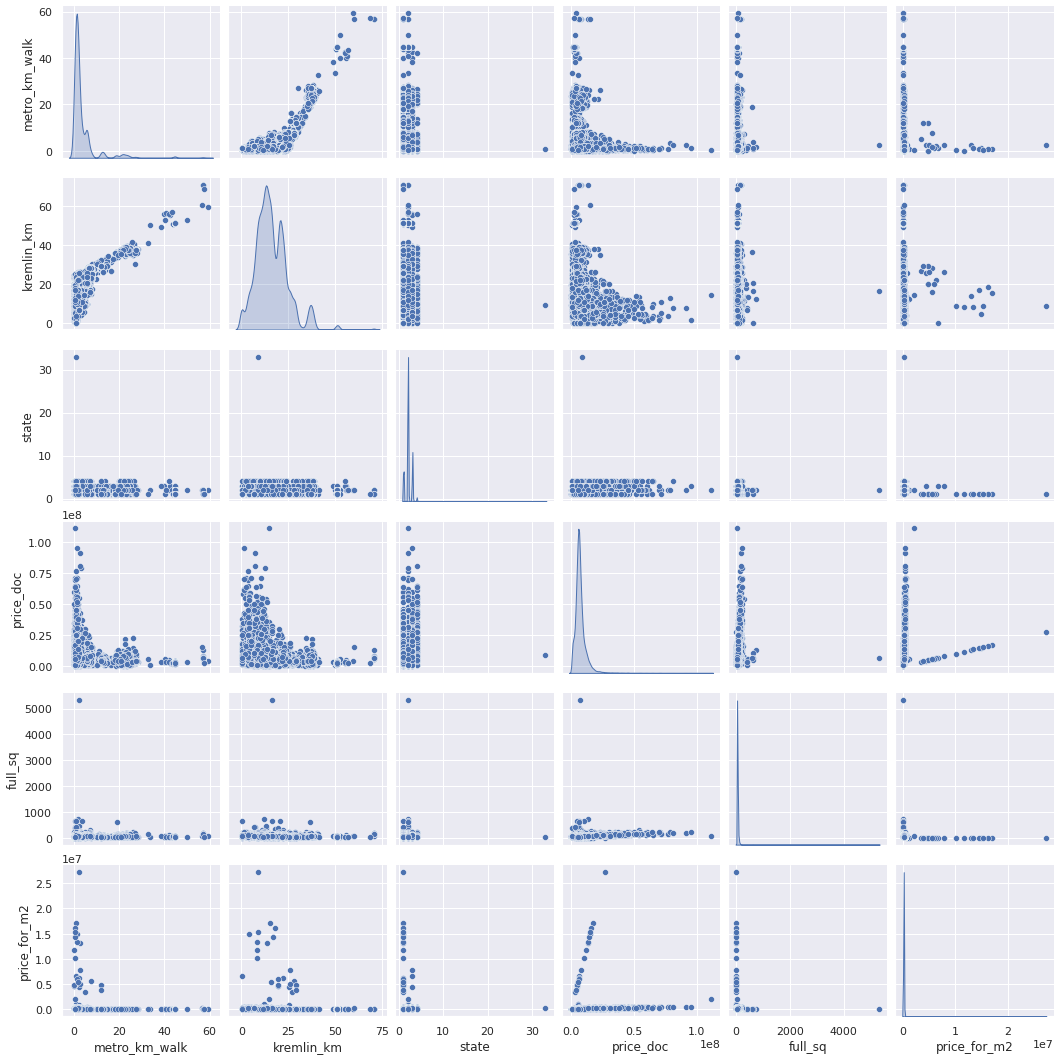

In [32]:
# Обрезаем выбросы, ориентируясь на график FEATURE / TARGET
sns.pairplot(train_set_3model, diag_kind = 'kde', height = 2.5, kind = 'scatter')

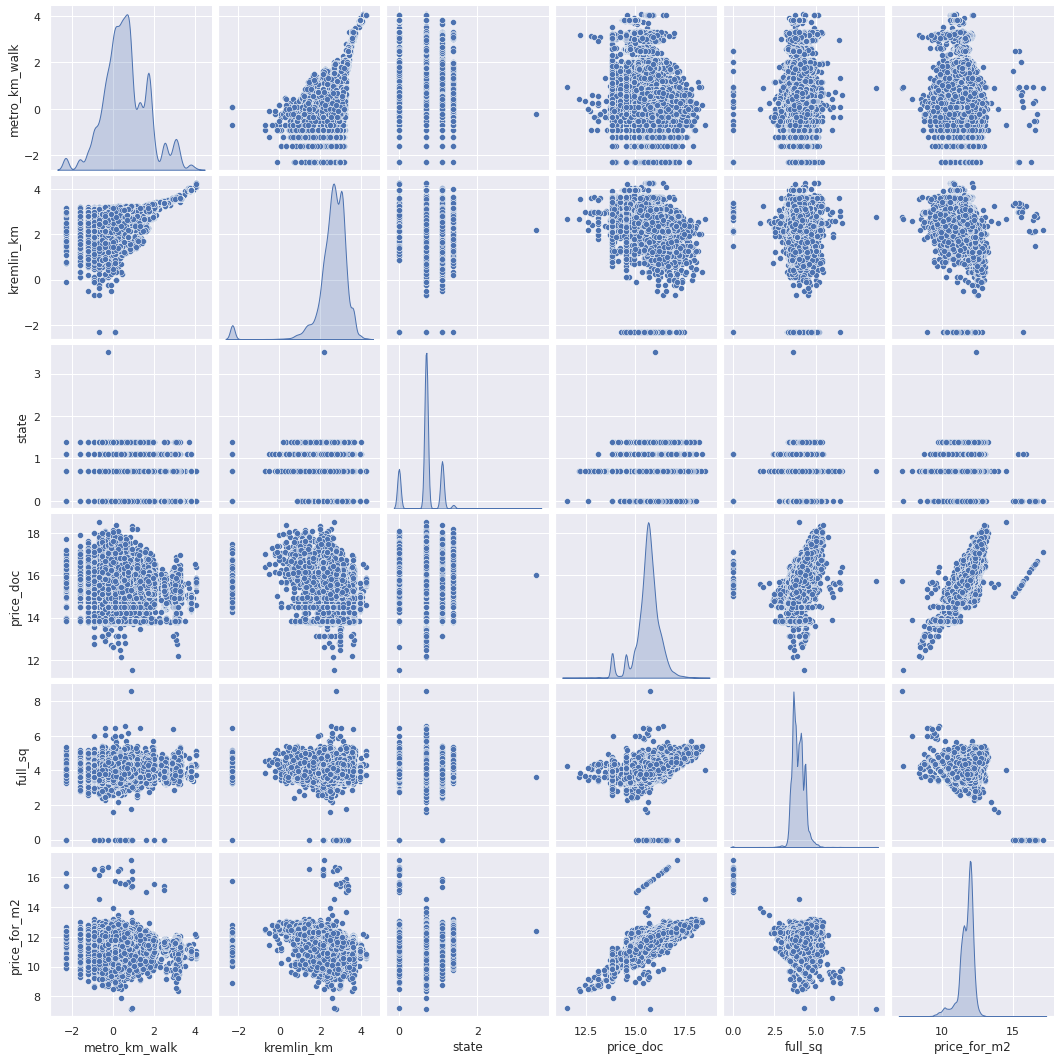

In [33]:
log_train_set_3model = np.log(train_set_3model)
sns.pairplot(log_train_set_3model, diag_kind = 'kde', height = 2.5, kind = 'scatter')

In [65]:
# Устанавливаем максимальное значение для состояния квартиры 4
train_set_3model['state'].clip(upper = 4, inplace=True)

# Устанавливаем максимальное значение для удаленности от кремля 40.
# Это делается на основе предположения, что за МКАДом ценник на квартиру не отличаются.
# Больше уже зависит от района, но в описании к данным районы я не нашел.
train_set_3model['kremlin_km'].clip(upper = 40, lower = 2, inplace=True)

# Ценник сильно завышают, когда метро находится в пешей доступности. 
# Если до станции не добраться за пол часа (3 км), ценник проседает.
# Ограничим максимальное значение с запасом до 8 км.
train_set_3model['metro_km_walk'].clip(upper = 8, inplace=True)

In [68]:
train_set_3model.head()

,metro_km_walk,kremlin_km,state,price_doc,full_sq,price_for_m2
0,1.1,15.2,2.0,5850000,43,136047.0
1,0.6,8.7,2.0,6000000,34,176471.0
2,1.4,9.1,2.0,5700000,43,132558.0
3,1.0,19.5,2.0,13100000,89,147191.0
4,0.7,2.6,2.0,16331452,77,212097.0


In [67]:
# Используем только те данные, где размер помещений пригоден для жилья
train_set_3model = train_set_3model[train_set_3model['full_sq'] > 10]

In [37]:
train_set_3model.describe()

,metro_km_walk,kremlin_km,state,price_doc,full_sq,price_for_m2
count,30441.000000,30441.000000,30441.000000,3.044100e+04,30441.000000,3.044100e+04
mean,2.599980,15.991140,2.059164,7.121544e+06,54.265924,1.328605e+05
std,2.321963,7.998467,0.633194,4.779104e+06,38.014520,5.600483e+04
min,0.000000,2.000000,1.000000,1.000000e+05,11.000000,1.290000e+03
25%,1.000000,10.500000,2.000000,4.740002e+06,38.000000,9.412000e+04
50%,1.700000,14.900000,2.000000,6.275000e+06,50.000000,1.352210e+05
75%,3.800000,20.700000,2.000000,8.300000e+06,63.000000,1.675680e+05
max,8.000000,40.000000,4.000000,1.111111e+08,5326.000000,2.020202e+06


In [69]:
# Удаляем явный выброс по ценнику за м2, последнее значение с бешенным ценником.
outlier_indice = train_set_3model.sort_values(by = 'price_doc')[-1:].index[0]
train_set_3model = train_set_3model.drop(labels = [outlier_indice],axis = 0)

In [70]:
# Используем только те данные, где размер помещений пригоден для жилья
# Удаляем явный выброс по фиче цена за м2, последнее значение с бешенным ценником.
# Зачищаем данные по ценнику за м2.
# Обрезаем по 1% по бокам.

quantile99 = train_set_3model['price_for_m2'].quantile(0.99)
quantile01 = train_set_3model['price_for_m2'].quantile(0.01)
train_set_3model = train_set_3model[(train_set_3model['price_for_m2'] > quantile01) & (train_set_3model['price_for_m2'] < quantile99)]

<AxesSubplot:>

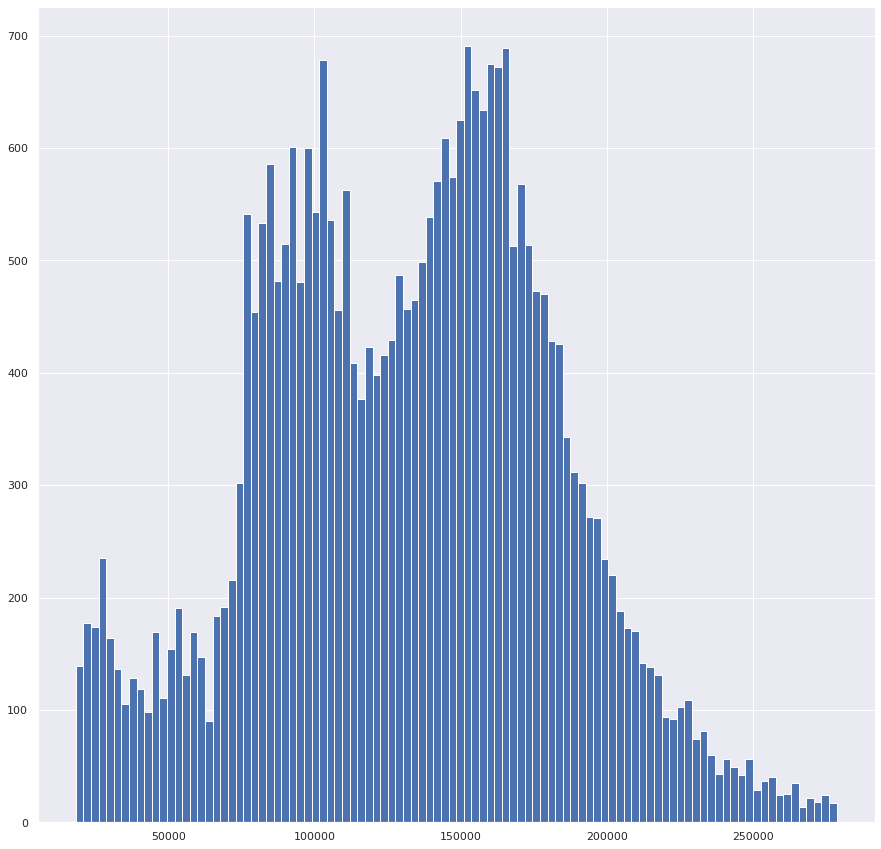

In [71]:
# train_set_3model['price_for_m2'].hist(bins = 100, figsize= (15,15), xlim = ([25, 50]))
train_set_3model['price_for_m2'].hist(bins = 100, figsize= (15,15))

In [72]:
# train_set_3model
# train_columns_3model
target3 = 'price_for_m2'
k_samples3 = 5

msle, mse = crossValFunc(train_set_3model, train_columns_3model, target3, k_samples3)
print(msle, mse)

Fold 1: msle 0.20717873352863408 , mse 1909190530.9653833
Fold 2: msle 0.20787858623004168 , mse 1921164030.2994492
Fold 3: msle 0.20924402355325414 , mse 1940578377.356337
Fold 4: msle 0.19660552712407853 , mse 1875310394.8325057
Fold 5: msle 0.2152101064268102 , mse 1974844885.9470937
0.20722339537256373 1924217643.8801541


In [80]:
#Обработка тест данных 3

test_3 = test.copy()

train_columns_3model = ['metro_km_walk', 'kremlin_km', 'state']

# Заполняем NaN's Медианами
med_list = [1.703934087, 14.87916101, 2.0]

for i, col in enumerate(train_columns_3model):
    test_3[col] = test_3[col].fillna(med_list[i])
    
# Округляем все float значения до 1го знака
for col in train_columns_3model:
    test_3[col] = round(test_3[col], 1)

# Устанавливаем максимальное значение для состояния квартиры 4
test_3['state'].clip(upper = 4, inplace=True)

# Устанавливаем максимальное значение для удаленности от кремля 40.
# Это делается на основе предположения, что за МКАДом ценник на квартиру не отличаются.
# Больше уже зависит от района, но в описании к данным районы я не нашел.
test_3['kremlin_km'].clip(upper = 40, lower = 2, inplace=True)

# Ценник сильно завышают, когда метро находится в пешей доступности. 
# Если до станции не добраться за пол часа (3 км), ценник проседает.
# Ограничим максимальное значение с запасом до 8 км.
test_3['metro_km_walk'].clip(upper = 8, inplace=True)

In [84]:
# *********************************************************************

# Сохраняем ответы 3
train_3 = train_set_3model
features_3 = train_columns_3model
target_3 = target3
# Эти данные нужно обработать. НЕЛЬЗЯ ОБРЕЗАТЬ
# test_3


model_3 = SGDRegressor()
model_3.fit(X = train_3[features_3], y = train_3[target_3])
test_predict_3 = model_3.predict(test_3[features_3])

write_submission_3 = pd.read_csv('../data/raw/sample_submission.csv')

write_submission_3['price_doc'] = (test_predict_3.clip(0.0001,) * test_3['full_sq'])
write_submission_3.to_csv('predict_3.csv', index= False)
# *********************************************************************

In [ ]:
# 4 МОДЕЛЬ

# Пробую использовать много признаков, которые в моем представлении могут повлиять на итоговый прайс

# 1) Повторяю обработку данных из предыдущей модели

# 2) Выбираю признаки, которые могут повлиять на итоговый прайс:
# Признаки из предыдущего набора:
# metro_km_walk, kremlin_km, state 

# Таргет:
# price_for_m2 = price_doc / full_sq

# Новые признаки:
# school_education_centers_top_20_raion - кол-во топ-20 школ в ближайшем радиусе
# school_km - расстояние до ближайшей школы

# railroad_terminal_raion - ЖД вокзал в районе
# zd_vokzaly_avto_km - расстояние до ЖД вкозала

# big_market_km - расстояние до рынков (тех, где можно взять еду подешевле)
# market_shop_km - расстояние до ближайшего магазина

# kindergarten_km - расстояние до ближайшего садика

# shopping_centers_km - расстояние до ближайшего шопинг центра
# trc_sqm_1500 - сумма м2 ТЦ в радиусе 1.5 км

# cafe_avg_price_1500 - средний ценник кафешек в радиусе 1.5 км
# cafe_sum_1000_min_price_avg - минимальный ценник кафешек в радиусе 1 км

# office_count_1500 - кол-во офисов в радиусе 1.5 км
# cafe_count_1000 - кол-во Кафешек в радиусе 1 км

# 3) Собираю все признаки в отдельный датафрейм.

# 4) Зачищаю набор данных

# 5) Обучаю модель

In [123]:
train_4model = train.copy()

In [124]:
# Создаю колонку с новым таргетом 'price_for_m2' с округлением до целых.
# Колонка содержит стоимость 1 м2 каждой квартиры.
train_4model['price_for_m2'] = round(train_4model['price_doc'] / train_4model['full_sq'])

In [125]:
# Используем только те данные, где размер помещений пригоден для жилья
train_4model = train_4model[train_4model['full_sq'] > 10]
print(np.shape(train_4model))

(30441, 293)


In [126]:
# Устанавливаем максимальное значение для состояния квартиры 4
train_4model['state'].clip(upper = 4, inplace=True)

# Устанавливаем максимальное значение для удаленности от кремля 40.
# Это делается на основе предположения, что за МКАДом ценник на квартиру не отличаются.
# Больше уже зависит от района, но в описании к данным районы я не нашел.
train_4model['kremlin_km'].clip(upper = 40, lower = 2, inplace=True)

# Ценник сильно завышают, когда метро находится в пешей доступности. 
# Если до станции не добраться за пол часа (3 км), ценник проседает.
# Ограничим максимальное значение с запасом до 8 км.
train_4model['metro_km_walk'].clip(upper = 8, inplace=True)

In [127]:
cols_temp = ['state','kremlin_km','metro_km_walk']
train_4model[cols_temp].describe()

,state,kremlin_km,metro_km_walk
count,16886.000000,30441.000000,30416.000000
mean,2.106656,15.991199,2.599404
std,0.847191,7.999468,2.320695
min,1.000000,2.000000,0.000000
25%,1.000000,10.460471,0.957384
50%,2.000000,14.877180,1.703999
75%,3.000000,20.666814,3.776836
max,4.000000,40.000000,8.000000


In [128]:
# Заменяю NaN's на Медианные значения
cols_temp = ['state','kremlin_km','metro_km_walk']
for col in cols_temp:
    train_4model[col] = train_4model[col].fillna(train_4model[col].median())

# Округляю фичи из предыдущей модели
for col in cols_temp:
    train_4model[col] = round(train_4model[col], 1)

quantile99 = train_4model['price_for_m2'].quantile(0.99)
quantile01 = train_4model['price_for_m2'].quantile(0.01)
train_4model = train_4model[(train_4model['price_for_m2'] > quantile01) & (train_4model['price_for_m2'] < quantile99)]


In [129]:
train_4model[cols_temp].head()

,state,kremlin_km,metro_km_walk
0,2.0,15.2,1.1
1,2.0,8.7,0.6
2,2.0,9.1,1.4
3,2.0,19.5,1.0
4,2.0,2.6,0.7


In [130]:
# 2) Выбираю признаки, которые могут повлиять на итоговый прайс и сохраняю в отдельный ДатаФрейм
train_columns_4model = ['state','kremlin_km','metro_km_walk','school_education_centers_top_20_raion', 'school_km', 'railroad_terminal_raion', 'zd_vokzaly_avto_km','big_market_km', 'market_shop_km', 'kindergarten_km', 'shopping_centers_km', 'trc_sqm_1500', 'cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg', 'office_count_1500', 'cafe_count_1000']
train_set_4model = train_4model[train_columns_4model + ['price_for_m2']].copy()


In [131]:
train_set_4model.head()

,state,kremlin_km,metro_km_walk,school_education_centers_top_20_raion,school_km,railroad_terminal_raion,zd_vokzaly_avto_km,big_market_km,market_shop_km,kindergarten_km,shopping_centers_km,trc_sqm_1500,cafe_avg_price_1500,cafe_sum_1000_min_price_avg,office_count_1500,cafe_count_1000,price_for_m2
0,2.0,15.2,1.1,0,0.177975,no,14.231961,10.814172,1.676258,0.145700,0.648488,171420,768.18,527.78,3,19,136047.0
1,2.0,8.7,0.6,0,0.273345,no,9.242586,6.910568,3.424716,0.147754,0.519311,127065,950.00,615.38,3,13,176471.0
2,2.0,9.1,1.4,0,0.158072,no,9.540544,5.752368,1.375443,0.049102,1.486533,2600,716.67,642.86,0,9,132558.0
3,2.0,19.5,1.0,0,0.236455,no,17.478380,27.892717,0.811275,0.179441,0.599914,89492,902.17,658.33,2,12,147191.0
4,2.0,2.6,0.7,0,0.376838,yes,1.595898,9.155057,1.969738,0.247901,0.429052,445900,1019.76,763.45,93,153,212097.0


In [132]:
# заменяем yes/no на 1/0
train_set_4model['railroad_terminal_raion'] = np.where(train_set_4model['railroad_terminal_raion'] == 'yes', 1, 0)

In [133]:
print(np.shape(train_set_4model))
train_set_4model.info()

# cafe_avg_price_1500, cafe_sum_1000_min_price_avg с NaN's

(29824, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 29824 entries, 0 to 30470
Data columns (total 17 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   state                                  29824 non-null  float64
 1   kremlin_km                             29824 non-null  float64
 2   metro_km_walk                          29824 non-null  float64
 3   school_education_centers_top_20_raion  29824 non-null  int64  
 4   school_km                              29824 non-null  float64
 5   railroad_terminal_raion                29824 non-null  int64  
 6   zd_vokzaly_avto_km                     29824 non-null  float64
 7   big_market_km                          29824 non-null  float64
 8   market_shop_km                         29824 non-null  float64
 9   kindergarten_km                        29824 non-null  float64
 10  shopping_centers_km                    29824 non-null  flo

In [134]:
# Заменяем NaN's на медианные значения
# cafe_avg_price_1500
# cafe_sum_1000_min_price_avg

train_set_4model['cafe_avg_price_1500'] = train_set_4model['cafe_avg_price_1500'].fillna(train_set_4model['cafe_avg_price_1500'].median())
train_set_4model['cafe_sum_1000_min_price_avg'] = train_set_4model['cafe_sum_1000_min_price_avg'].fillna(train_set_4model['cafe_sum_1000_min_price_avg'].median())

In [136]:
# train_set_4model
# train_columns_4model
target4 = 'price_for_m2'
k_samples4 = 5

msle, mse = crossValFunc(train_set_4model, train_columns_4model, target4, k_samples4)
print(msle, mse)

Fold 1: msle 718.1767429751621 , mse 3.955633315096496e+37
Fold 2: msle 136.79637998212505 , mse 1.8430747203130295e+38
Fold 3: msle 137.07695210041211 , mse 9.727157816289901e+37
Fold 4: msle 137.03588319660562 , mse 6.412940505677197e+39
Fold 5: msle 869.6321955904975 , mse 1.9202175713316302e+38
399.7436307689605 1.3852195292311055e+39


In [144]:
#Обработка тест данных 4

test_4 = test.copy()

# Колонка содержит стоимость 1 м2 каждой квартиры.

# Устанавливаем максимальное и минимальное значения
test_4['state'].clip(upper = 4, inplace=True)
test_4['kremlin_km'].clip(upper = 40, lower = 2, inplace=True)
test_4['metro_km_walk'].clip(upper = 8, inplace=True)

# Заменяю NaN's на Медианные значения
train_columns_4model = ['state','kremlin_km','metro_km_walk','school_education_centers_top_20_raion', 'school_km', 'zd_vokzaly_avto_km','big_market_km', 'market_shop_km', 'kindergarten_km', 'shopping_centers_km', 'trc_sqm_1500', 'cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg', 'office_count_1500', 'cafe_count_1000']
for col in train_columns_4model:
    test_4[col] = test_4[col].fillna(train_4model[col].median())

# Округляю фичи из предыдущей модели
cols_temp = ['state','kremlin_km','metro_km_walk']
for col in cols_temp:
    test_4[col] = round(test_4[col], 1)

# 2) Выбираю признаки, которые могут повлиять на итоговый прайс и сохраняю в отдельный ДатаФрейм
train_columns_4model = ['state','kremlin_km','metro_km_walk','school_education_centers_top_20_raion', 'school_km', 'railroad_terminal_raion', 'zd_vokzaly_avto_km','big_market_km', 'market_shop_km', 'kindergarten_km', 'shopping_centers_km', 'trc_sqm_1500', 'cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg', 'office_count_1500', 'cafe_count_1000']
test_4 = test_4[train_columns_4model + ['full_sq']].copy()

# заменяем yes/no на 1/0
test_4['railroad_terminal_raion'] = np.where(test_4['railroad_terminal_raion'] == 'yes', 1, 0)

# Заменяем NaN's на медианные значения
# cafe_avg_price_1500
# cafe_sum_1000_min_price_avg

test_4['cafe_avg_price_1500'] = test_4['cafe_avg_price_1500'].fillna(train_set_4model['cafe_avg_price_1500'].median())
test_4['cafe_sum_1000_min_price_avg'] = test_4['cafe_sum_1000_min_price_avg'].fillna(train_set_4model['cafe_sum_1000_min_price_avg'].median())

In [147]:
# *********************************************************************

# Сохраняем ответы 4
train_4 = train_set_4model
features_4 = train_columns_4model
target_4 = target4
# Эти данные нужно обработать. НЕЛЬЗЯ ОБРЕЗАТЬ
# test_4


model_4 = SGDRegressor()
model_4.fit(X = train_4[features_4], y = train_4[target_4])
test_predict_4 = model_4.predict(test_4[features_4])

write_submission_4 = pd.read_csv('../data/raw/sample_submission.csv')

write_submission_4['price_doc'] = (test_predict_4.clip(0.0001,) * test_4['full_sq'])
write_submission_4.to_csv('predict_4.csv', index= False)
# *********************************************************************

In [149]:
# 5А модель
# 1) Уменьшаю количество опорных признаков и создаю новый признак.
# Проверяю влияние среднего прайса и минимального ценника близлежащих ресторанов.
# 2) Считаю среднее значение суммы cafe_avg_price_1500 и cafe_sum_1000_min_price_avg
# avg_cafe = (cafe_avg_price_1500 + cafe_sum_1000_min_price_avg) / 2

train_columns_5A_model = ['state', 'kremlin_km', 'metro_km_walk']
train_set_5A_model = train_set_4model[train_columns_5A_model + ['price_for_m2','cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg']].copy()

In [150]:
# Создаю новый признак avg_cafe
train_set_5A_model['avg_cafe'] = (train_set_5A_model['cafe_avg_price_1500'] + train_set_5A_model['cafe_sum_1000_min_price_avg']) / 2
train_columns_5A_model += ['avg_cafe']

In [151]:
train_set_5A_model[train_columns_5A_model].head()

,state,kremlin_km,metro_km_walk,avg_cafe
0,2.0,15.2,1.1,647.980
1,2.0,8.7,0.6,782.690
2,2.0,9.1,1.4,679.765
3,2.0,19.5,1.0,780.250
4,2.0,2.6,0.7,891.605


In [152]:
# train_set_5A_model
# train_columns_5A_model
target5A = 'price_for_m2'
k_samples5A = 5

msle, mse = crossValFunc(train_set_5A_model, train_columns_5A_model, target5A, k_samples5A)
print(msle, mse)

Fold 1: msle 423.2329681683344 , mse 1.194086492016991e+28
Fold 2: msle 137.1566698020433 , mse 6.542046803263906e+27
Fold 3: msle 384.96025723987475 , mse 1.6776700717684412e+27
Fold 4: msle 137.10603261403546 , mse 9.075086392647106e+27
Fold 5: msle 136.99217584483537 , mse 2.753987622044673e+27
243.88962073382467 6.397931161978807e+27


In [159]:
#Обработка тест данных 5A

test_5A = test.copy()

train_columns_5A_model = ['state', 'kremlin_km', 'metro_km_walk']

test_5A = test_4[train_columns_5A_model + ['cafe_avg_price_1500', 'cafe_sum_1000_min_price_avg', 'full_sq']].copy()

# Создаю новый признак avg_cafe
test_5A['avg_cafe'] = (test_5A['cafe_avg_price_1500'] + test_5A['cafe_sum_1000_min_price_avg']) / 2
train_columns_5A_model += ['avg_cafe']

In [160]:
# *********************************************************************

# Сохраняем ответы 5A

train_5A = train_set_5A_model
features_5A = train_columns_5A_model
target_5A = target5A
# Эти данные нужно обработать. НЕЛЬЗЯ ОБРЕЗАТЬ
# test_5


model_5A = SGDRegressor()
model_5A.fit(X = train_5A[features_5A], y = train_5A[target_5A])
test_predict_5A = model_5A.predict(test_5A[features_5A])

write_submission_5A = pd.read_csv('../data/raw/sample_submission.csv')

write_submission_5A['price_doc'] = (test_predict_5A.clip(0.0001,) * test_5A['full_sq'])
write_submission_5A.to_csv('predict_5A.csv', index= False)
# *********************************************************************

In [164]:
# 5B МОДЕЛЬ
# Нормализую полученный признак
# Копирую матрицу признаков из предыдущей модели
# Нормализую колонку avg_cafe

train_set_5B_model = train_set_5A_model.copy()
train_columns_5B_model = train_columns_5A_model.copy()

# Нормализую признак до значений других колонок (от 0 до 50) путем деления всех значений на 100 и округления
train_set_5B_model['avg_cafe'] = round(((train_set_5B_model['avg_cafe']) / 100), 2)

In [165]:
train_columns_5B_model

['state', 'kremlin_km', 'metro_km_walk', 'avg_cafe']

In [166]:
train_set_5B_model[train_columns_5B_model].head()

,state,kremlin_km,metro_km_walk,avg_cafe
0,2.0,15.2,1.1,6.48
1,2.0,8.7,0.6,7.83
2,2.0,9.1,1.4,6.80
3,2.0,19.5,1.0,7.80
4,2.0,2.6,0.7,8.92


In [168]:
# train_set_5B_model
# train_columns_5B_model
target5B = 'price_for_m2'
k_samples5B = 5


msle, mse = crossValFunc(train_set_5B_model, train_columns_5B_model, target5B, k_samples5B)
print(msle, mse)

Fold 1: msle 0.20778217533167556 , mse 1927812291.6932693
Fold 2: msle 0.21978543427676062 , mse 1954990270.6847365
Fold 3: msle 0.19352053456416 , mse 1868953692.6466832
Fold 4: msle 0.19340377134366413 , mse 1840291405.864469
Fold 5: msle 0.22212190695111977 , mse 1978514694.4807413
0.207322764493476 1914112471.0739799


In [169]:
#Обработка тест данных 5B

test_5B = test_5A.copy()

train_columns_5B_model = train_columns_5A_model.copy()

# Нормализую признак до значений других колонок (от 0 до 50) путем деления всех значений на 100 и округления
test_5B['avg_cafe'] = round(((test_5B['avg_cafe']) / 100), 2)

In [172]:
# *********************************************************************

# Сохраняем ответы 5B

train_5B = train_set_5B_model
features_5B = train_columns_5B_model
target_5B = target5B
# Эти данные нужно обработать. НЕЛЬЗЯ ОБРЕЗАТЬ
# test_5


model_5B = SGDRegressor()
model_5B.fit(X = train_5B[features_5B], y = train_5B[target_5B])
test_predict_5B = model_5B.predict(test_5B[features_5B])

write_submission_5B = pd.read_csv('../data/raw/sample_submission.csv')

write_submission_5B['price_doc'] = (test_predict_5B.clip(0.0001,) * test_5B['full_sq'])
write_submission_5B.to_csv('predict_5B.csv', index= False)
# *********************************************************************

In [95]:
# 1
print("1. На as is данных (замена NaN's на 0)")
msle, mse = crossValFunc(train_1model, features1, target1, k_samples1)
print(msle, mse)
print()
# 2
print('2. Те же признаки, но очищенные')
msle, mse = crossValFunc(train_2model, features2, target2, k_samples2)
print(msle, mse)
print()
# 3
print('3. Поиск цены за м2. Небольшое изменение в наборе признаков')
msle, mse = crossValFunc(train_set_3model, train_columns_3model, target3, k_samples3)
print(msle, mse)
print()
# 4
print('4. Использую много очищенных НЕнормализованных признаков')
msle, mse = crossValFunc(train_set_4model, train_columns_4model, target4, k_samples4)
print(msle, mse)
print()
# 5A
print('5A. Генерирую новый признак. Добавляю его к 3му набору')
msle, mse = crossValFunc(train_set_5A_model, train_columns_5A_model, target5A, k_samples5A)
print(msle, mse)
print()
# 5B
print('5B. Нормализую новый признак.')
msle, mse = crossValFunc(train_set_5B_model, train_columns_5B_model, target5B, k_samples5B)
print(msle, mse)

1. На as is данных (замена NaN's на 0)
Fold 1: msle 69.55255839272169 , mse 1.1346026180836792e+19
Fold 2: msle 211.68210341028004 , mse 552181722406348.25
Fold 3: msle 143.631157499335 , mse 3.775971721803622e+17
Fold 4: msle 99.8236045213637 , mse 2301034539886294.0
Fold 5: msle 0.6235740331388663 , mse 166418935125231.44
105.06259957136785 2.345328597642915e+18

2. Те же признаки, но очищенные
Fold 1: msle 0.3108718489587219 , mse 10020560316734.93
Fold 2: msle 95.34077286826593 , mse 63032564352303.625
Fold 3: msle 0.33759016736641084 , mse 16840566231310.73
Fold 4: msle 6.69687378939319 , mse 15992031325215.895
Fold 5: msle 0.2840593255533715 , mse 8880839632365.742
20.594033599907526 22953312371586.188

3. Поиск цены за м2. Небольшое изменение в наборе признаков
Fold 1: msle 0.23258520062074056 , mse 2140762657.825296
Fold 2: msle 0.20955431237903258 , mse 1970088474.657627
Fold 3: msle 0.2095904716387915 , mse 1923873016.415491
Fold 4: msle 0.2034891991254864 , mse 1932944682.85

In [ ]:
# Шаблон для создания csv файла.

model___.fit(X = train___[features___].fillna(0), y = train___[target___])

test_predict___ = model___.predict(test___[features___].fillna(0))
write_submission___ = pd.read_csv___('../data/raw/sample_submission.csv')

write_submission___['price_doc'] = test_predict___
write_submission___['price_doc'] = write_submission___['price_doc'].clip(0,)
# Как толковать сохраненный файл? Что там? Предсказанные цены на квартиры? 
# Если там предсказанные цены, как они соотносятся с номерами квартир в файле sample_submission? 
write_submission___.to_csv('predict___.csv', index= False)

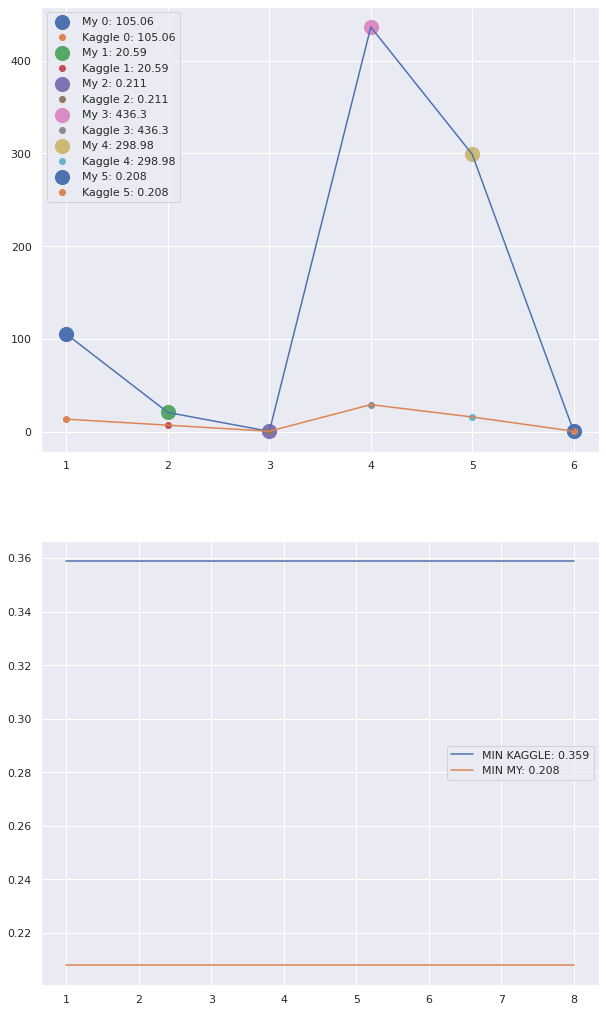

In [214]:
fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (10,18))

notebook_score = [105.06, 20.59, 0.211, 436.3, 298.98, 0.208]
public_kaggle_score = [13.35, 6.88, 0.362, 29.03, 15.71, 0.359]

for ind in range(len(notebook_score)):
    ax[0].scatter((ind + 1), notebook_score[ind], s = 200,label = f'My {ind}: {notebook_score[ind]}')
    ax[0].scatter((ind + 1), public_kaggle_score[ind], label = f'Kaggle {ind}: {notebook_score[ind]}')
ax[0].legend()
ax[0].plot(np.arange(1,7),notebook_score)
ax[0].plot(np.arange(1,7),public_kaggle_score)


ax[1].plot([1,8], [min(public_kaggle_score)]*2, label = f'MIN KAGGLE: {min(public_kaggle_score)}')
ax[1].plot([1,8], [min(notebook_score)]*2, label = f'MIN MY: {min(notebook_score)}')
ax[1].legend()
ax[1].

plt.show()